### Caso de Estudios:
* Tenemos el set de datos de un banco, el banco ha notado que una gran cantidad de clientes están dejando el banco y quieren ver porque.
* Nuestro trabajo es crear un modelo que prediga que clientes están en mayor riesgo de dejar el banco, el mismo modelo puede ser aplicado para evaluar si una persona debería tener un préstamo aprobado.
* Estamos intentando predecir el resultado de nuestra variable dependiente "Exited" baso en la info de las variables independientes.



### Vamos a instalar las librerias:
* <b>Theano</b> (computación numérica) corre también en el GPU.
* <b>TensorFlow</b> (computación numérica)<br><br>

- Ambas librerias son utilizadas para investigación y desarrollo, si quieres crear tus propias redes neuronales desde cero podrías hacerlo con estas 2 librerias, pero nosotros vamos a utilizar unas que ya están pre hechas.<br><br>

- Vamos a utilizar la libreria llamada Keras,

* <b>Keras</b> (basado en theano y TensorFlow, modelos de Deep Learning).

#### Para instalar Theano:
> pip install theano

#### Para instalar Keras:
> pip install keras<br>
> o<br>
> conda install keras

#### Para instalar TensorFlow:
> conda install tensorflow <br>
> Y <br>
> conda install tensorflow-estimator=2.1.0

In [ ]:
# Importando las librerias en Python
import numpy as np
import pandas as pd



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 1. Dando formato a los datos de Churn_Modelling.csv utilizando redes neuronales

In [ ]:
# Importación de datos de la base de datos:
customer_data = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
customer_data.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [ ]:
dataset = customer_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
print(dataset)
dataset.size

In [ ]:
dataset =  dataset.drop(['Geography', 'Gender'], axis=1)


In [ ]:
Geography = pd.get_dummies(customer_data.Geography).iloc[:,1:]
Gender = pd.get_dummies(customer_data.Gender).iloc[:,1:]

In [ ]:
dataset = pd.concat([dataset,Geography,Gender], axis=1)


In [ ]:
X =  dataset.drop(['Exited'], axis=1)
y = dataset['Exited']
X
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0) 
classifier.fit(X_train, y_train) 
predictions = classifier.predict(X_test)
X_test


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
9394,597,35,8,131101.04,1,1,1,192852.67,1,0,0
898,523,40,2,102967.41,1,1,0,128702.10,0,0,0
2398,706,42,8,95386.82,1,1,1,75732.25,0,1,0
5906,788,32,4,112079.58,1,0,0,89368.59,0,0,1
2343,706,38,5,163034.82,2,1,1,135662.17,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1037,625,24,1,0.00,2,1,1,180969.55,0,0,0
2899,586,35,7,0.00,2,1,0,70760.69,0,0,0
9549,578,36,1,157267.95,2,1,0,141533.19,0,1,1
2740,650,34,4,142393.11,1,1,1,11276.48,1,0,1


In [ ]:

nuevo_cliente = classifier.predict(np.array([[600,40,3,60000,2,1,1,50000,0,0,0]]))


nuevo_cliente = (nuevo_cliente>0.5)
nuevo_cliente

array([False])

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predictions )) 
print(accuracy_score(y_test, predictions ))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.73      0.51      0.60       405

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000

0.8635


In [ ]:
from sklearn.metrics import confusion_matrix
mc = confusion_matrix(y_test,predictions)
mc

array([[1519,   76],
       [ 197,  208]])

In [ ]:
(1519+208)/2000

0.8635

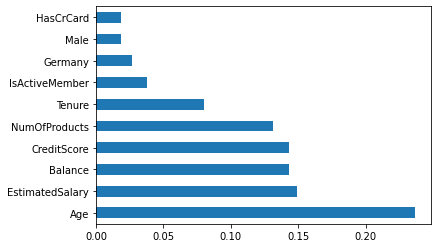

In [ ]:
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [ ]:
# Seleccionamos las variables independientes (columnas) que nos vayan a servir
X = dataset.iloc[:, 3:13].values
X

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [ ]:
# SEleccionar la variable dependiente
y = dataset.iloc[:, 13].values
y

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
# Codificación de datos categóricos
# Codificación de las variables independientes
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Categorizamos los paises, codificados por números
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
X

array([[619, 0, 'Female', ..., 1, 1, 101348.88],
       [608, 2, 'Female', ..., 0, 1, 112542.58],
       [502, 0, 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 0, 'Female', ..., 0, 1, 42085.58],
       [772, 1, 'Male', ..., 1, 0, 92888.52],
       [792, 0, 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
# Categorizamos los generos, codificados por números
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
# OneHotEncoder codifica características enteras categóricas como una matriz numérica one-hot
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [ ]:
# Eliminar la variable ficticia que hemos creado
X = X[:,1:]
X

array([[0.0000000e+00, 0.0000000e+00, 6.1900000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 1.0000000e+00, 6.0800000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [0.0000000e+00, 0.0000000e+00, 5.0200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 7.0900000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [1.0000000e+00, 0.0000000e+00, 7.7200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [0.0000000e+00, 0.0000000e+00, 7.9200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [ ]:
# Dividir el conjunto de datos en el conjunto de entrenamiento y pruebas
from sklearn.model_selection import train_test_split
# Dedicar 20% datos a la prueba y el restante al entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Escalado de Categorias
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_test

array([[ 1.75486502, -0.57369368, -0.55204276, ...,  0.64259497,
         0.9687384 ,  1.61085707],
       [-0.5698444 , -0.57369368, -1.31490297, ...,  0.64259497,
        -1.03227043,  0.49587037],
       [-0.5698444 ,  1.74309049,  0.57162971, ...,  0.64259497,
         0.9687384 , -0.42478674],
       ...,
       [-0.5698444 ,  1.74309049, -0.74791227, ...,  0.64259497,
        -1.03227043,  0.71888467],
       [ 1.75486502, -0.57369368, -0.00566991, ...,  0.64259497,
         0.9687384 , -1.54507805],
       [ 1.75486502, -0.57369368, -0.79945688, ...,  0.64259497,
        -1.03227043,  1.61255917]])

### 2. Creando Red Neuronal Artificial

In [ ]:
# importando librerias y paquetes de Keras
# Sequential ayuda a iniciarlizar la red neuronal
# Dense ayuda a agregar capas ocultas en nuestra red
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [ ]:
# Inicializar la Red Neuronal, definiendo como una secuencia de capas
clasificador = Sequential()

### 2.1. Pasos de Retropropagación (EPOCHs)

El algoritmo de Retropropagación que permite actualizar los pesos en la variable W de la sinapsis.

* __Paso 1.__ Inicia los pesos con números aleatorios cercanos a 0.
* __Paso 2.__ Colocamos cada variable independiente de tu set de datos en la capa de input.
* __Paso 3.__ Propagación hacia adelante, pasa la información individual (sinapsis) realizando la suma de los pesos con las variables, después pasa por la función de activación, y por último pasa la ^y (resultado de la predicción). Las neuronas son activadas de manera que su impacto es limitado por los pesos.
* __Paso 4.__ Comparamos la ^y con y, o sea, los datos (resultados) predecidos con los datos (resultados) reales que tenemos. Y utilizamos la función C que es el margen de error (Siempre disminuir).
* __Paso 5.__ La retropropagación, actualiza los pesos de acuerdo a C (margen de error), o sea, cuan responsables son por el margen de erro.
> El rango de aprendizaje decide por cuanto actualizamos los pesos.
* __Paso 6.__ Tienes dos opciones para minizar la función C que es el margen del error:
> repite pasos 1 a 5 y actualizamos los pesos después de cada observación (aprendizaje reforzado o ***reinforcement learning***).<br>
> o<br>
> Repite los pasos de 1 a 5 solo después de un lote de observaciones (aprendizaje por lote o ***descenso de gradiente estocástico***).<br>
* __Paso 7.__ Cuando todo el set de datos pasa por la red neuronal, eso hace 1 EPOCH. Repite más epochs hasta refinal el modelo.

In [ ]:
# Agregando Capa input y Primero Capa Oculta
# units son la cantidad de nodos que se desean agregar (e.g. puede ser la suma de los nodos de ingreso y salida).
# kernel_initializer es el Paso 1, de tipo distribución uniforme
# activation o Función de activación de tipo rectificante = relu
# input_dim crea la capa de ingreso, en este caso 11 columnas
clasificador.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=11))

In [ ]:
clasificador

In [ ]:
# Agregando segunda capa oculta
clasificador.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

In [ ]:
# Agregando Capa de Salida con Función de Activación Sigmoide
clasificador.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [ ]:
# Aplicamos el Descenso de Gradiente Estocástica, significa Compilar Red Neuronal.
# optimazer permite definir el algorimo de descenso de gradiente.
# loss es el margen de error "C". En redes convulucionales entendemos como "Binary CrossEntropy" o Entropia Cruzada.
# binary_crossentropy para una salida (Verdadero o Falso), para varios resultados usamos categorical_crossentropy
# metric es el criterio para evaluar el modelo, 
clasificador.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Ajustamos Red Neuronal en el Set de Entrenamiento
# batch_size es el número de ejemplos por gradiente actualizable.
clasificador.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
8000/8000 [==============================] - 2s 190us/step - loss: 0.4833 - accuracy: 0.7959
Epoch 2/100
8000/8000 [==============================] - 1s 116us/step - loss: 0.4273 - accuracy: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 107us/step - loss: 0.4215 - accuracy: 0.8045
Epoch 4/100
8000/8000 [==============================] - 1s 108us/step - loss: 0.4182 - accuracy: 0.8227
Epoch 5/100
8000/8000 [==============================] - 1s 109us/step - loss: 0.4158 - accuracy: 0.8250
Epoch 6/100
8000/8000 [==============================] - 1s 110us/step - loss: 0.4140 - accuracy: 0.8304
Epoch 7/100
8000/8000 [==============================] - 1s 100us/step - loss: 0.4123 - accuracy: 0.8317
Epoch 8/100
8000/8000 [==============================] - 1s 114us/step - loss: 0.4115 - accuracy: 0.8329
Epoch 9/100
8000/8000 [==============================] - 1s 101us/step - loss: 0.4103 - accuracy: 0.8341
Epoch 10/100
8000/8000 [==============================]

8000/8000 [==============================] - 1s 110us/step - loss: 0.3996 - accuracy: 0.8349
Epoch 79/100
8000/8000 [==============================] - 1s 112us/step - loss: 0.3997 - accuracy: 0.8350
Epoch 80/100
8000/8000 [==============================] - 1s 115us/step - loss: 0.3996 - accuracy: 0.8350
Epoch 81/100
8000/8000 [==============================] - 1s 112us/step - loss: 0.3994 - accuracy: 0.8347
Epoch 82/100
8000/8000 [==============================] - 1s 111us/step - loss: 0.3997 - accuracy: 0.8345
Epoch 83/100
8000/8000 [==============================] - 1s 107us/step - loss: 0.3994 - accuracy: 0.8363
Epoch 84/100
8000/8000 [==============================] - 1s 112us/step - loss: 0.3996 - accuracy: 0.8372
Epoch 85/100
8000/8000 [==============================] - 1s 107us/step - loss: 0.3997 - accuracy: 0.8351
Epoch 86/100
8000/8000 [==============================] - 1s 110us/step - loss: 0.3999 - accuracy: 0.8354
Epoch 87/100
8000/8000 [==============================] - 1

### 3. Haciendo Predicciones y Evolucionando el Modelo

* Entrenado el modelo en el Set de Entrenamiento, ahora vamos a predecir el ser de pruebas.

In [ ]:
# Prediciendo Set de Pruebas
y_pred = clasificador.predict(X_test)
y_pred

array([[0.22939725],
       [0.3602734 ],
       [0.21292198],
       ...,
       [0.19014585],
       [0.21544693],
       [0.10834239]], dtype=float32)

In [ ]:
y_pred = (y_pred>0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
# Matri de Confusión: Resumen de los resultados de la predicción del problema de clasificación del modelo.
from sklearn.metrics import confusion_matrix
mc = confusion_matrix(y_test, y_pred)
mc
# ¿que quieren decir estos resultado?

array([[1533,   62],
       [ 249,  156]], dtype=int64)

In [ ]:
(1533 + 156)/2000

0.8445

### 4. Aplicando nuestro modelo de Predicción

Ingresa un cliente al banco con los siguiente valores:
* Geografía: Francia
* Puntaje de Crédito: 600
* Género: Masculino
* Edad: 40 años
* Tenencia: 3 años
* Saldo: \$60000
* Número de productos: 2
* ¿Tiene este cliente una tarjeta de crédito? Sí
* ¿Este cliente es un miembro activo? Sí
* Salario estimado: $50000

In [ ]:
nuevo_cliente = clasificador.predict(sc.transform(np.array([[0,0,600,1,40,3,60000,2,1,1,50000]])))
nuevo_cliente = (nuevo_cliente>0.5)
nuevo_cliente

array([[False]])